In [1]:
import pandas as pd
from pandas import Series,DataFrame
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
market=pd.read_csv('market_basket_dataset.csv')


In [3]:
market.head()

,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [4]:
market.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Price         0
CustomerID    0
dtype: int64

In [5]:
market.describe()

,BillNo,Quantity,Price,CustomerID
count,500.000000,500.000000,500.000000,500.000000
mean,1247.442000,2.978000,5.617660,54229.800000
std,144.483097,1.426038,2.572919,25672.122585
min,1000.000000,1.000000,1.040000,10504.000000
25%,1120.000000,2.000000,3.570000,32823.500000
50%,1246.500000,3.000000,5.430000,53506.500000
75%,1370.000000,4.000000,7.920000,76644.250000
max,1497.000000,5.000000,9.940000,99162.000000


c:\Users\vthur\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Item Distribution')

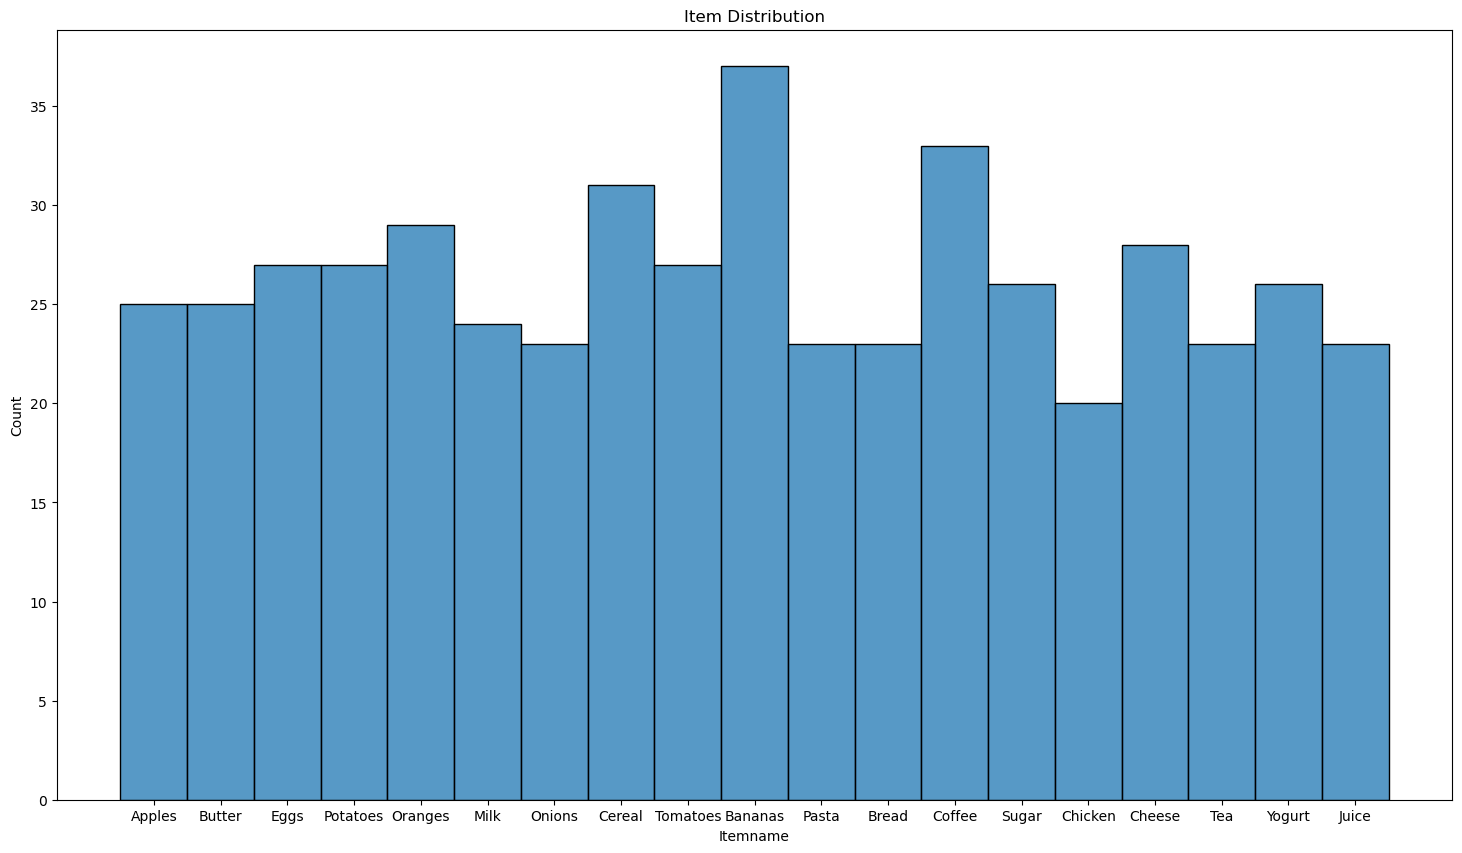

In [6]:
#sales distribution of items
plt.figure(figsize=(18,10))
market.dropna()
sns.histplot(market,x='Itemname')
plt.title('Item Distribution')

<Axes: xlabel='Quantity', ylabel='Itemname'>

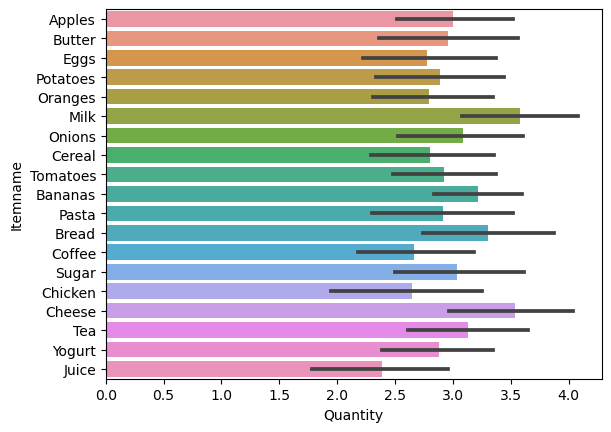

In [7]:
sns.barplot(market,x='Quantity',y='Itemname')

Text(0.5, 1.0, 'Top 10 Items Purchased')

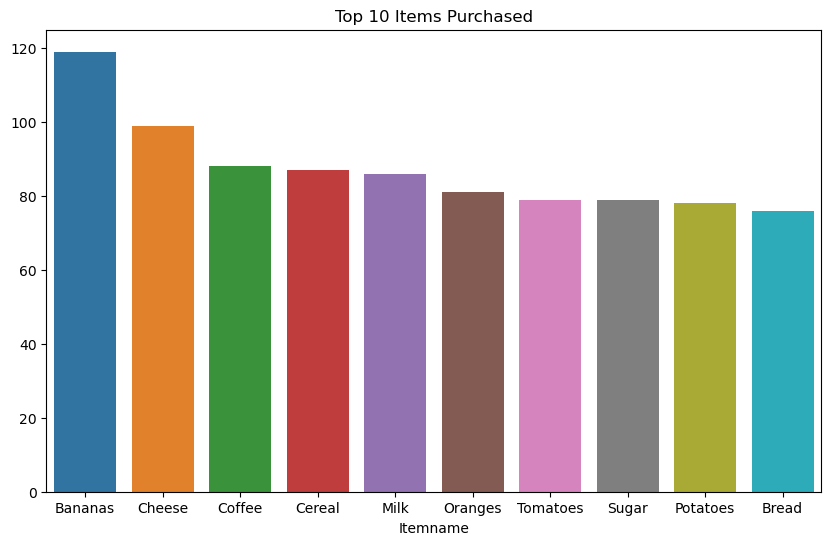

In [8]:
#top 10 most popular items sold by the store

#item popularity
plt.figure(figsize=(10,6))

item_popularity=market.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False)
top_n=10

fig = go.Figure()
sns.barplot(x=item_popularity.index[:top_n],y=item_popularity.values[:top_n])
plt.title('Top 10 Items Purchased')

                     

<Axes: xlabel='Quantity', ylabel='Price'>

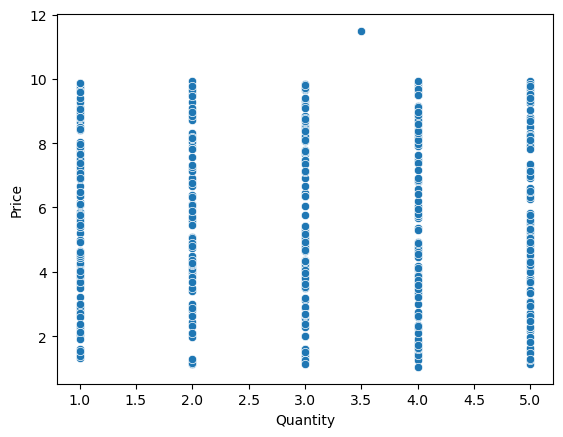

In [9]:
# Calculate average quantity and spending per customer

customer_behaviour=market.groupby('CustomerID').agg({'Quantity': 'mean','Price': 'sum'}).reset_index()

cust_data=pd.DataFrame({'CustomerID': customer_behaviour['CustomerID'],
                        'Average_quantity': customer_behaviour['Quantity'],
                        'Total Spend': customer_behaviour['Price']})

sns.scatterplot(x=customer_behaviour['Quantity'],y=customer_behaviour['Price'],markers='o')

(0.0, 1.0, 0.0, 1.0)

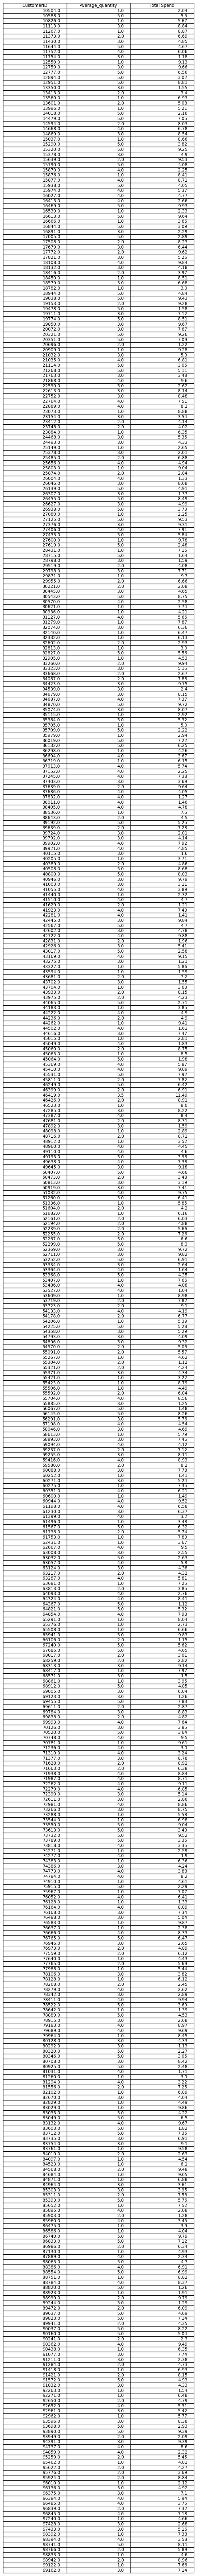

In [15]:

cust_data=pd.DataFrame({'CustomerID': customer_behaviour['CustomerID'],
                        'Average_quantity': customer_behaviour['Quantity'],
                        'Total Spend': customer_behaviour['Price']})
headers=list(cust_data.columns)
data=cust_data.values.tolist()
plt.figure(figsize=(8, 6))
plt.table(cellText=data, colLabels=headers,loc='center')


ax = plt.gca()
ax.axis('off')


The Apriori algorithm is used to discover frequent item sets in large transactional datasets. It aims to identify items that are frequently purchased together in transactional data. It helps uncover patterns in customer behaviour, allowing businesses to make informed decisions about product placement, promotions, and marketing

In [18]:
from mlxtend.frequent_patterns import apriori,association_rules

In [19]:
market.head()


,BillNo,Itemname,Quantity,Price,CustomerID
0,1000,Apples,5,8.30,52299
1,1000,Butter,4,6.06,11752
2,1000,Eggs,4,2.66,16415
3,1000,Potatoes,4,8.10,22889
4,1004,Oranges,2,7.26,52255


In [31]:
# Group items by BillNo and create a list of items for each bill
basket=market.groupby('BillNo')['Itemname'].apply(list).reset_index()

# Encode items as binary variables using one-hot encoding
import pandas as pd

# Encode items as binary variables using one-hot encoding

basket_onehot = pd.get_dummies(basket_encoded)

# Display the one-hot encoded DataFrame
print(basket_onehot.head())

# Find frequent itemsets using Apriori algorithm with lower support
frequent_items = apriori(basket_onehot, min_support=0.01, use_colnames=True)



   Apples  Bananas  Bread  Butter  Cereal  Cheese  Chicken  Coffee  Eggs  \
0       1        0      0       1       0       0        0       0     1   
1       0        0      0       0       0       0        0       0     0   
2       0        0      0       0       1       0        0       0     0   
3       0        0      0       0       1       0        0       0     0   
4       0        1      0       0       0       0        0       0     0   

   Juice  Milk  Onions  Oranges  Pasta  Potatoes  Sugar  Tea  Tomatoes  Yogurt  
0      0     0       0        0      0         1      0    0         0       0  
1      0     0       0        1      0         0      0    0         0       0  
2      0     1       1        0      0         0      0    0         0       0  
3      0     0       0        0      0         1      0    0         1       0  
4      0     0       0        0      0         0      0    0         0       0  


c:\Users\vthur\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [35]:
# Generate association rules with lower lift threshold

associate_rules=association_rules(frequent_items,metric='lift',min_threshold=0.5)

print(associate_rules[['antecedents','consequents','support','confidence','lift']].head(10))

  antecedents consequents   support  confidence      lift
0     (Bread)    (Apples)  0.045752    0.304348  1.862609
1    (Apples)     (Bread)  0.045752    0.280000  1.862609
2    (Butter)    (Apples)  0.026144    0.160000  0.979200
3    (Apples)    (Butter)  0.026144    0.160000  0.979200
4    (Apples)    (Cereal)  0.019608    0.120000  0.592258
5    (Cereal)    (Apples)  0.019608    0.096774  0.592258
6    (Apples)    (Cheese)  0.039216    0.240000  1.311429
7    (Cheese)    (Apples)  0.039216    0.214286  1.311429
8    (Apples)   (Chicken)  0.032680    0.200000  1.530000
9   (Chicken)    (Apples)  0.032680    0.250000  1.530000


Antecedents: These are the items that are considered as the starting point or “if” part of the association rule. For example, Bread, Butter, Cereal, Cheese, and Chicken are the antecedents in this analysis.
Consequents: These are the items that tend to be purchased along with the antecedents or the “then” part of the association rule.
Support: Support measures how frequently a particular combination of items (both antecedents and consequents) appears in the dataset. It is essentially the proportion of transactions in which the items are bought together. For example, the first rule indicates that Bread and Apples are bought together in approximately 4.58% of all transactions.
Confidence: Confidence quantifies the likelihood of the consequent item being purchased when the antecedent item is already in the basket. In other words, it shows the probability of buying the consequent item when the antecedent item is bought. For example, the first rule tells us that there is a 30.43% chance of buying Apples when Bread is already in the basket.
Lift: Lift measures the degree of association between the antecedent and consequent items, while considering the baseline purchase probability of the consequent item. A lift value greater than 1 indicates a positive association, meaning that the items are more likely to be bought together than independently. A value less than 1 indicates a negative association. For example, the first rule has a lift of approximately 1.86, suggesting a positive association between Bread and Apples.